In [1]:
from sympy import *
from pprint import pprint

x = Symbol('x')
print('La variable : ' +str(x))

La variable : x


In [2]:
from sympy.abc import x
print('La variable, desde el método "abc" : ' +str(x))

La variable, desde el método "abc" : x


In [5]:
x = Symbol('x')
y = Function('y')(x)
print('La función y, dependiente de x : ' +str(y))

y5 = y.subs(x,5)
print('La función y, evaluada en 5 : ' +str(y5))

La función y, dependiente de x : y(x)
La función y, evaluada en 5 : y(5)


In [7]:
# A su vez, las funciones Derivative y método diff permiten definir ecuaciones diferenciales,
# de manera indistinta

ec1 = Derivative(y,x)-sin(2*x)-log(x+1)
print('La ecuación diferencial, usando "Derivative" : ' + str(ec1))

ec2 = y.diff(x)-sin(2*x)-log(1+x)
print('La ecuación diferencial, usando el método "diff" : ' + str(ec2))

print('Comprobación de que son expresiones equivalentes : ' +str(ec1 == ec2))


La ecuación diferencial, usando "Derivative" : -log(x + 1) - sin(2*x) + Derivative(y(x), x)
La ecuación diferencial, usando el método "diff" : -log(x + 1) - sin(2*x) + Derivative(y(x), x)
Comprobación de que son expresiones equivalentes : True


In [88]:
import sympy as sp
import numpy as np
import math

In [11]:
x = sp.Symbol('x')
y = sp.Function('y')(x)
ec1 = sp.Derivative(y,x) - sp.sin(2*x) - sp.log(x+1)
ec2 = y.diff(x) - sp.sin(2*x) - sp.log(1+x)

# La funcion "dsolve" resuelve directamente ecuaciones diferenciales, 
# notar que aparecen constantes correspondientes a las familas de funciones que son solución general de la ecuación.
from sympy.solvers.ode import dsolve

sol = dsolve(ec1,y)
sol_expresion = sol.rhs

print('La solución general viene dada por: ' +str(sol_expresion))

sol = dsolve(ec2,y)
sol_expresion = sol.rhs

print('La solución general viene dada por: ' +str(sol_expresion))


La solución general viene dada por: C1 + x*log(x + 1) - x + log(x + 1) - cos(2*x)/2
La solución general viene dada por: C1 + x*log(x + 1) - x + log(x + 1) - cos(2*x)/2


Solucion particular, para la condición inicial y(0)=1 : x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 3/2


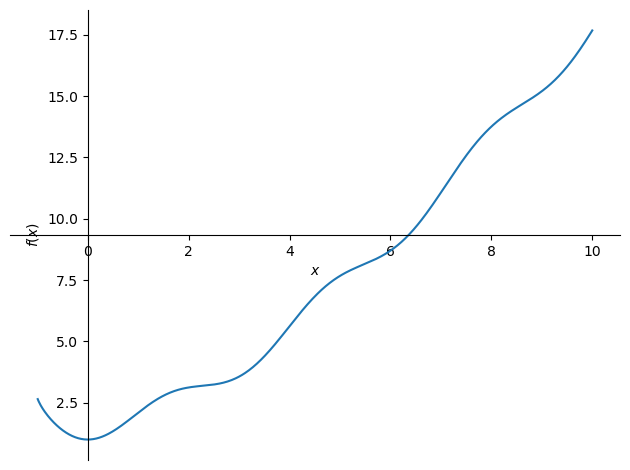

In [12]:
# Para establecer un problema de Cauchy, con unas condiciones iniciales,
# hay que utilizar el argumento "ics" de la función dsolve, con la siguiente sintaxis:

sol = dsolve(ec1,y,ics={y.subs(x,0):1})
sol_expresion = sol.rhs

print('Solucion particular, para la condición inicial y(0)=1 : ' +str(sol_expresion))

plot(sol_expresion)

In [35]:
constantes=[]
[constantes.append({y.subs(x,0):i}) for i in range(-5,5)]
print(type(constantes))
pprint([i for i in constantes])

<class 'list'>
[{y(0): -5},
 {y(0): -4},
 {y(0): -3},
 {y(0): -2},
 {y(0): -1},
 {y(0): 0},
 {y(0): 1},
 {y(0): 2},
 {y(0): 3},
 {y(0): 4}]


In [36]:
sol = []
for i in constantes:
    sol_temp = dsolve(ec1,y,ics = i)
    sol.append(sol_temp.rhs)
pprint(sol)

[x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 9/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 7/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 5/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 3/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 1/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 1/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 3/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 5/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 7/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 9/2]


In [30]:
constantes=[]
for i in range(-5,5):
    constantes.append({y.subs(x,0):i})
print(type(constantes))
print([i for i in constantes])

<class 'list'>
[{y(0): -5}, {y(0): -4}, {y(0): -3}, {y(0): -2}, {y(0): -1}, {y(0): 0}, {y(0): 1}, {y(0): 2}, {y(0): 3}, {y(0): 4}]


In [38]:
constantes=[{y.subs(x,0):i} for i in range(-5,5)]
print(type(constantes))
pprint([i for i in constantes])

sol = [dsolve(ec1,y,ics = i).rhs for i in constantes]
pprint(sol)

<class 'list'>
[{y(0): -5},
 {y(0): -4},
 {y(0): -3},
 {y(0): -2},
 {y(0): -1},
 {y(0): 0},
 {y(0): 1},
 {y(0): 2},
 {y(0): 3},
 {y(0): 4}]
[x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 9/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 7/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 5/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 3/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 - 1/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 1/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 3/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 5/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 7/2,
 x*log(x + 1) - x + log(x + 1) - cos(2*x)/2 + 9/2]


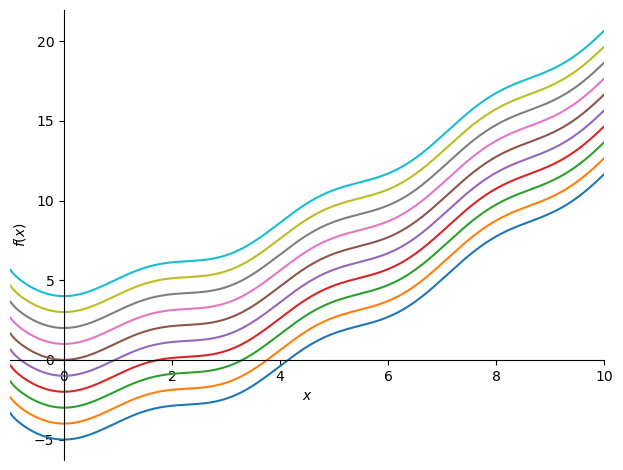

range(0, 10)


In [43]:
P = plot(sol[0],xlim=(-1,10), show=False)

for i in range(len(sol)-1):
    p = plot(sol[i+1],xlim=(-1,10),show = False)
    P.extend(p)

P.show()
print(range(len(sol)))

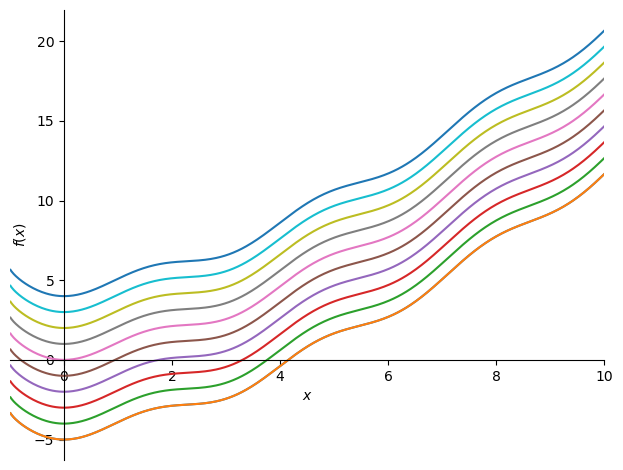

range(0, 10)


In [51]:
constantes = [{y.subs(x,0):i} for i in range(-5,5)]
sol = [dsolve(ec1,y,ics = i).rhs for i in constantes]

P = None
for s in sol:
    p = plot(s, xlim=(-1,10), show=False)
    P = p if P is None else P
    P.extend(p)

P.show()
print(range(len(sol)))

In [55]:
def a():
    print('A')
    return True

def b():
    print('B')
    return True

print(a() or b())

A
True


In [58]:
def a():
    print('A')
    return False

def b():
    print('B')
    return True

print(a() and b())

A
False


In [69]:
print('Y' if 0 else 'N')
print('Y' if '' else 'N')
print('Y' if [] else 'N')
print('Y' if {} else 'N')

N
N
N
N


In [80]:
a = None
print(a and a.upper())

None


In [82]:
P = None
P = P or 'A'
P = P or 'B'
print(P)

A


In [83]:
P = None
P = P if P else 'A'
P = P if P else 'B'
print(P)

A


In [ ]:
def a():
    print('A')
    return True

def b():
    print('B')
    return True

print(a() or b())

In [84]:
# Dos alternativas para construir derivadas de orden superior a uno: 

ec3 = sp.Derivative(y,x,x)
ec4 = sp.Derivative(sp.Derivative(y,x),x)
print(ec4==ec3)

ec5 = 2*ec3+1
print(ec5)

sol = dsolve(ec5, y)
print(sol)

True
2*Derivative(y(x), (x, 2)) + 1
Eq(y(x), C1 + C2*x - x**2/4)


In [87]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

ec3 = y.diff(x,x)
ec4 = y.diff(x).diff(x)
print(ec4==ec3)

ec5 = 2*ec3+1
print(ec5)

sol = dsolve(ec5, y)
print(sol)

True
2*Derivative(y(x), (x, 2)) + 1
Eq(y(x), C1 + C2*x - x**2/4)


In [95]:
import numpy as np
from scipy.integrate import solve_ivp

def ec(t, y):
    return np.sin(2*t) + np.log(1+t)

sol = solve_ivp(ec, [0, 10], [1])

print(sol)



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  2.648e+00  4.378e+00  6.338e+00  8.410e+00
             1.000e+01]
        y: [[ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.018e+00
              2.269e+00  3.299e+00  6.561e+00  9.295e+00  1.441e+01
              1.767e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0


In [97]:
a, b, c = [1, 2, 3]
print(a, b, c)

1 2 3


In [100]:
a, b, c = {1:'a', 2:'b', 3:'c'}
print(a, b, c)

1 2 3


In [101]:
{1:'a', 2:'b', 3:'c'}.items()

dict_items([(1, 'a'), (2, 'b'), (3, 'c')])

In [104]:
for k, v in {1:'a', 2:'b', 3:'c'}.items():
    print (k, v)

1 a
2 b
3 c


In [103]:
(ak, av), (bk, bv), (ck, cv) = {1:'a', 2:'b', 3:'c'}.items()
print(ak, bk, ck)
print(av, bv, cv)

1 2 3
a b c
